In [1]:
import os

import pandas as pd

In [2]:
def print_distribution(name, samples):
    data = pd.read_csv(os.path.join(data_dir, '{}.csv'.format(name)), header=None)
    distribution = dict()
    for index, row in samples.iterrows():
        indices = row.values.tolist()
        classes = data.iloc[indices, -1].value_counts()
        for class_name, class_dist in classes.iteritems():
            if class_name not in distribution:
                distribution[class_name] = 0
            distribution[class_name] += class_dist
    total = sum(distribution.values())
    
    org_distribution = dict()
    df = data.iloc[:,-1].value_counts()
    for class_name, class_dist in df.iteritems():
        if class_name not in org_distribution:
            org_distribution[class_name] = 0
        org_distribution[class_name] += class_dist * n
    
    df1 = pd.DataFrame(distribution, index=['sampled'])
    df2 = pd.DataFrame(org_distribution, index=['original'])
    df = pd.concat([df1, df2])
    df.plot.barh(stacked=True, title=name)
    
    print('{} {} Total across samples: {} Total in dataset: {} Ratio: {:.0f}/{}'.format(name, distribution, total, data.shape[0], total/data.shape[0], n))

In [3]:
n = 10  #number of bootstrap samples per dataset

In [4]:
data_dir = os.path.join('..', 'data', 'ordinal', 'csv')

# Weights set to 1.0

In [5]:
sampling_dir = os.path.join('..', 'results', 'sampling')
samples_by_dataset = dict()
for file in os.listdir(sampling_dir):
    path = os.path.join(sampling_dir, file)
    df = pd.read_csv(path, header=None)
    name = file.replace('.csv', '')
    samples_by_dataset[name] = df

housing {3: 1298, 2: 1236, 1: 1266, 4: 1260} Total across samples: 5060 Total in dataset: 506 Ratio: 10/10
ERA_n {4: 1781, 3: 1817, 5: 1552, 2: 1411, 6: 1155, 7: 886, 1: 875, 8: 331, 9: 192} Total across samples: 10000 Total in dataset: 1000 Ratio: 10/10
breast-w {'benign': 4547, 'malignant': 2443} Total across samples: 6990 Total in dataset: 699 Ratio: 10/10
ESL_n {6: 1336, 5: 1173, 4: 990, 7: 665, 3: 377, 8: 187, 2: 97, 9: 39, 1: 16} Total across samples: 4880 Total in dataset: 488 Ratio: 10/10
dataset3 {3: 3557, 2: 3017, 4: 3081, 1: 2401, 5: 1224} Total across samples: 13280 Total in dataset: 1328 Ratio: 10/10
windsor {0: 1354, 2: 1378, 1: 1354, 3: 1374} Total across samples: 5460 Total in dataset: 546 Ratio: 10/10
balance_scale {'R': 2821, 'L': 2957, 'B': 472} Total across samples: 6250 Total in dataset: 625 Ratio: 10/10
breast-w_nm {'benign': 4578, 'malignant': 2412} Total across samples: 6990 Total in dataset: 699 Ratio: 10/10
LEV_n {2: 4004, 1: 2826, 3: 1954, 0: 919, 4: 297} Tot

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



SWD_n {4: 4049, 3: 3509, 5: 2119, 2: 323} Total across samples: 10000 Total in dataset: 1000 Ratio: 10/10
cpu {3: 518, 2: 526, 1: 542, 0: 504} Total across samples: 2090 Total in dataset: 209 Ratio: 10/10
denbosch {1: 614, 0: 576} Total across samples: 1190 Total in dataset: 119 Ratio: 10/10


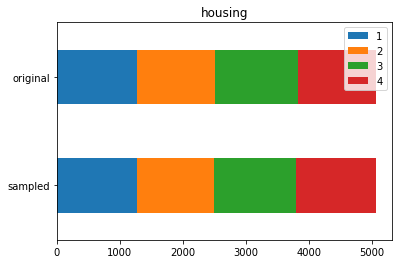

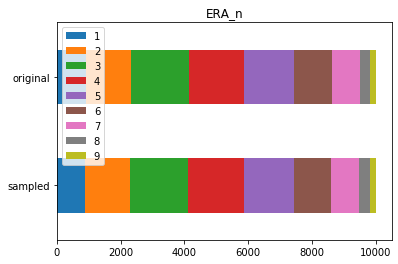

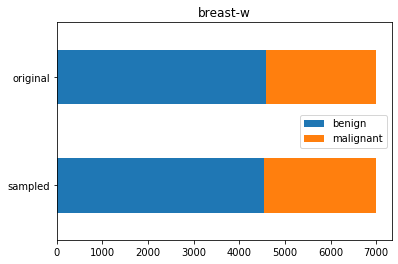

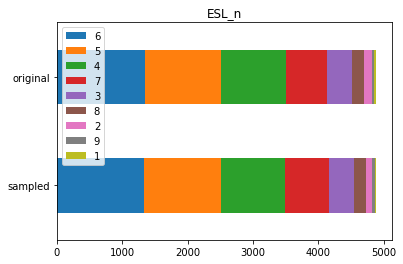

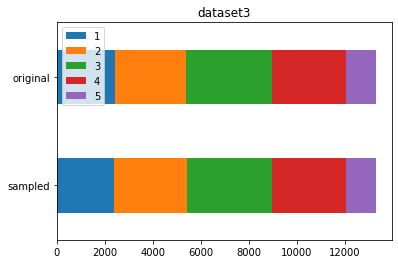

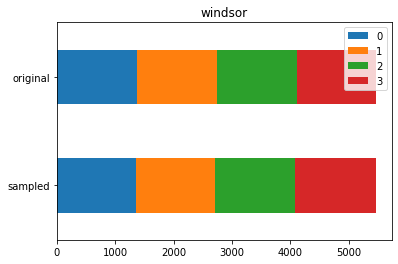

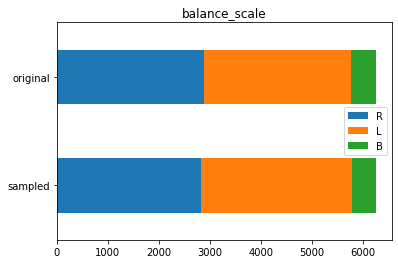

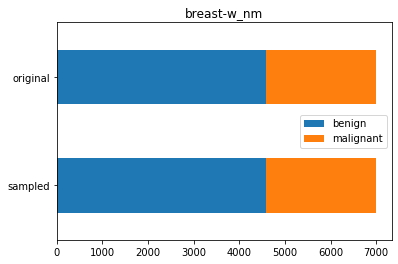

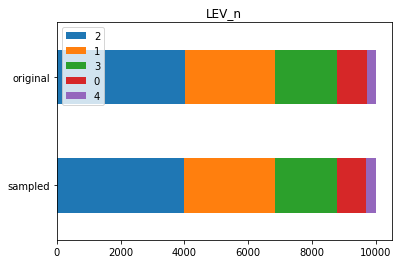

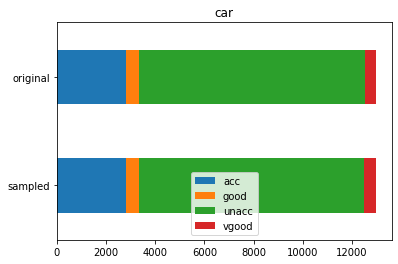

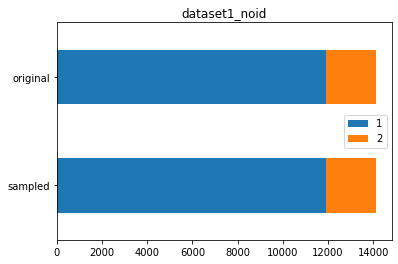

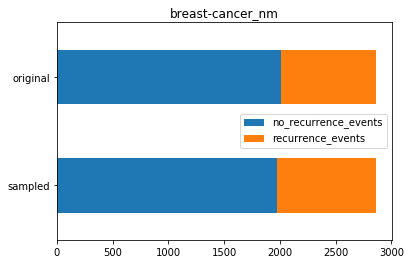

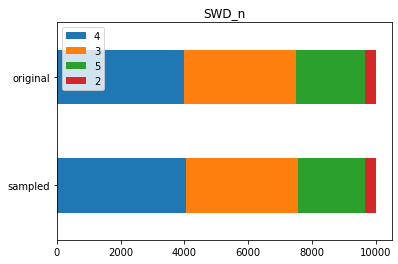

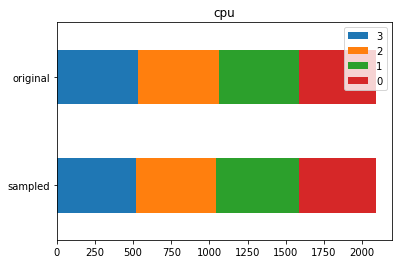

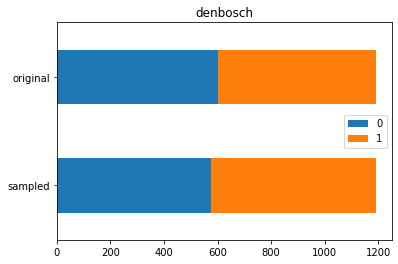

In [6]:
%matplotlib inline
for name, df in samples_by_dataset.items():
    print_distribution(name, df)

# Weights set according to class size
Each example's weight is set to ```min_class_size / current_example_class_size```

Bootstrap size equal to dataset size.

In [38]:
balanced_sampling_dir = os.path.join('..', 'results', 'balanced_sampling')
balanced_samples_by_dataset = dict()
for file in os.listdir(balanced_sampling_dir):
    path = os.path.join(balanced_sampling_dir, file)
    df = pd.read_csv(path, header=None)
    name = file.replace('.csv', '')
    balanced_samples_by_dataset[name] = df

housing {1: 1261, 3: 1281, 4: 1233, 2: 1285} Total across samples: 5060 Total in dataset: 506 Ratio: 10/10
ERA_n {1: 1190, 6: 1110, 9: 1052, 7: 1132, 3: 1064, 8: 1131, 5: 1105, 4: 1134, 2: 1082} Total across samples: 10000 Total in dataset: 1000 Ratio: 10/10
breast-w {'malignant': 3476, 'benign': 3514} Total across samples: 6990 Total in dataset: 699 Ratio: 10/10
ESL_n {2: 549, 3: 562, 7: 550, 8: 561, 6: 550, 4: 509, 1: 554, 5: 569, 9: 476} Total across samples: 4880 Total in dataset: 488 Ratio: 10/10


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



dataset3 {3: 2630, 4: 2657, 1: 2682, 5: 2662, 2: 2649} Total across samples: 13280 Total in dataset: 1328 Ratio: 10/10
windsor {3: 1300, 1: 1428, 0: 1352, 2: 1380} Total across samples: 5460 Total in dataset: 546 Ratio: 10/10
balance_scale {'B': 2127, 'L': 2094, 'R': 2029} Total across samples: 6250 Total in dataset: 625 Ratio: 10/10
breast-w_nm {'malignant': 3525, 'benign': 3465} Total across samples: 6990 Total in dataset: 699 Ratio: 10/10
LEV_n {4: 1970, 3: 2004, 1: 2059, 2: 2020, 0: 1947} Total across samples: 10000 Total in dataset: 1000 Ratio: 10/10
car {'acc': 3302, 'unacc': 3188, 'vgood': 3278, 'good': 3192} Total across samples: 12960 Total in dataset: 1296 Ratio: 10/10
dataset1_noid {2: 7010, 1: 7100} Total across samples: 14110 Total in dataset: 1411 Ratio: 10/10
breast-cancer_nm {'recurrence_events': 1457, 'no_recurrence_events': 1403} Total across samples: 2860 Total in dataset: 286 Ratio: 10/10
SWD_n {5: 2523, 2: 2508, 4: 2527, 3: 2442} Total across samples: 10000 Total i

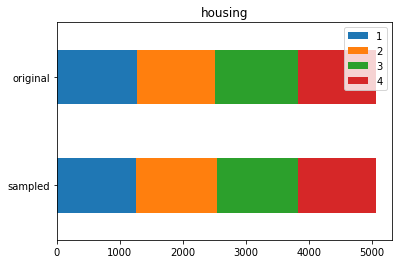

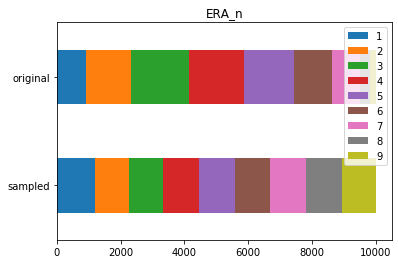

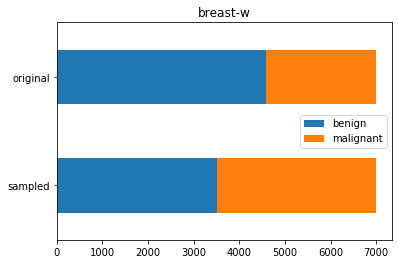

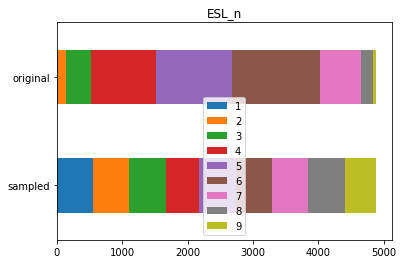

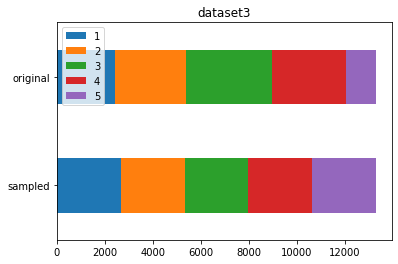

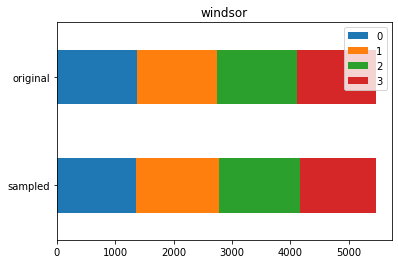

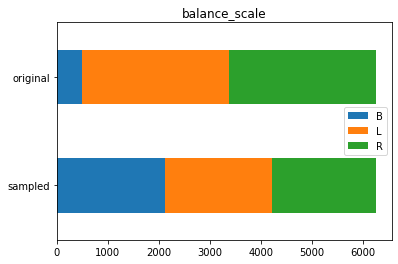

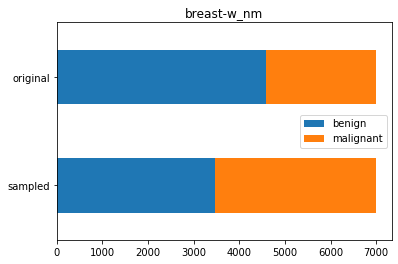

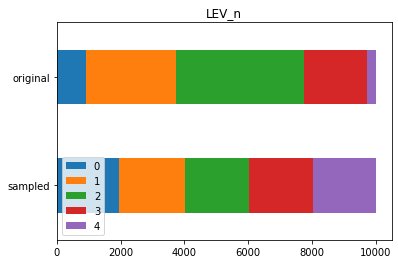

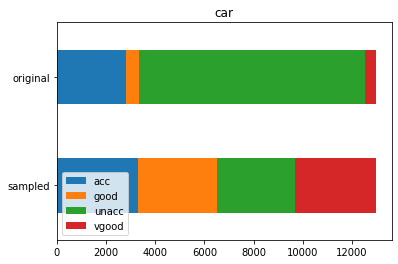

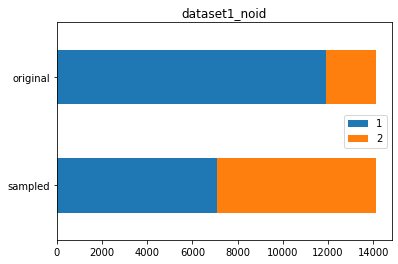

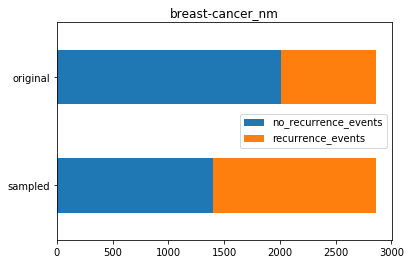

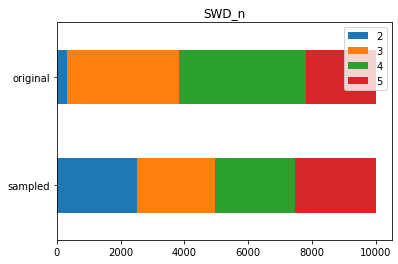

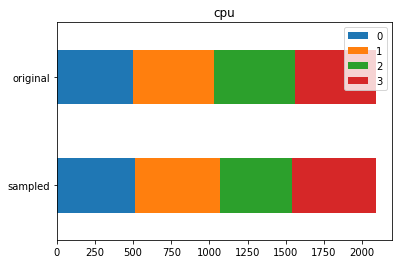

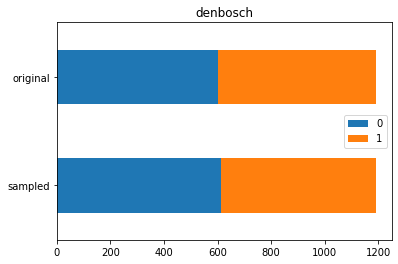

In [39]:
%matplotlib inline
for name, df in balanced_samples_by_dataset.items():
    print_distribution(name, df)

# Reduced bootstrap size
Weights are set as above. Bootstrap size equal to ```min_class_size * number_of_classes```

In [35]:
balanced_undersampling_dir = os.path.join('..', 'results', 'balanced_undersampling')
balanced_under_samples_by_dataset = dict()
for file in os.listdir(balanced_undersampling_dir):
    path = os.path.join(balanced_undersampling_dir, file)
    df = pd.read_csv(path, header=None)
    name = file.replace('.csv', '')
    balanced_under_samples_by_dataset[name] = df

housing {1: 1242, 3: 1277, 4: 1270, 2: 1171} Total across samples: 4960 Total in dataset: 506 Ratio: 10/10
ERA_n {6: 190, 7: 171, 9: 179, 3: 189, 8: 180, 4: 177, 2: 185, 1: 171, 5: 178} Total across samples: 1620 Total in dataset: 1000 Ratio: 2/10
breast-w {'benign': 2412, 'malignant': 2408} Total across samples: 4820 Total in dataset: 699 Ratio: 7/10
ESL_n {7: 20, 6: 17, 2: 18, 1: 18, 5: 30, 4: 19, 9: 24, 8: 17, 3: 17} Total across samples: 180 Total in dataset: 488 Ratio: 0/10
dataset3 {5: 1221, 4: 1231, 2: 1287, 3: 1221, 1: 1240} Total across samples: 6200 Total in dataset: 1328 Ratio: 5/10
windsor {1: 1368, 3: 1311, 0: 1328, 2: 1393} Total across samples: 5400 Total in dataset: 546 Ratio: 10/10
balance_scale {'L': 494, 'R': 514, 'B': 462} Total across samples: 1470 Total in dataset: 625 Ratio: 2/10
breast-w_nm {'malignant': 2493, 'benign': 2327} Total across samples: 4820 Total in dataset: 699 Ratio: 7/10


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



LEV_n {1: 286, 4: 279, 2: 259, 0: 273, 3: 253} Total across samples: 1350 Total in dataset: 1000 Ratio: 1/10
car {'unacc': 467, 'acc': 459, 'vgood': 459, 'good': 415} Total across samples: 1800 Total in dataset: 1296 Ratio: 1/10
dataset1_noid {1: 2111, 2: 2249} Total across samples: 4360 Total in dataset: 1411 Ratio: 3/10
breast-cancer_nm {'no_recurrence_events': 861, 'recurrence_events': 839} Total across samples: 1700 Total in dataset: 286 Ratio: 6/10
SWD_n {4: 317, 2: 311, 3: 325, 5: 327} Total across samples: 1280 Total in dataset: 1000 Ratio: 1/10
cpu {3: 485, 2: 505, 1: 521, 0: 489} Total across samples: 2000 Total in dataset: 209 Ratio: 10/10
denbosch {1: 562, 0: 618} Total across samples: 1180 Total in dataset: 119 Ratio: 10/10


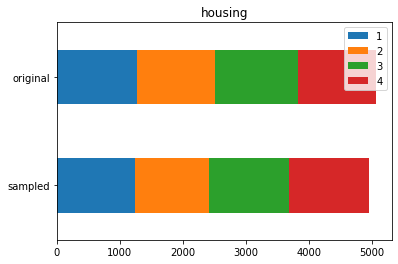

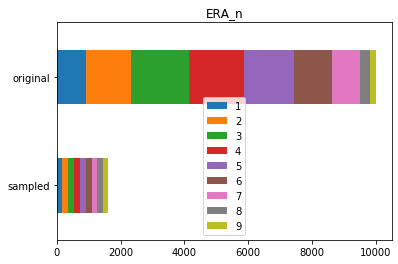

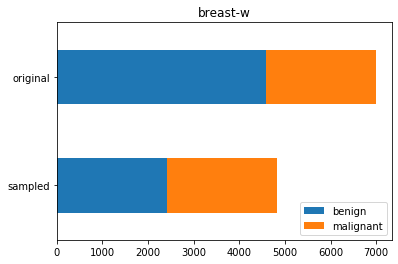

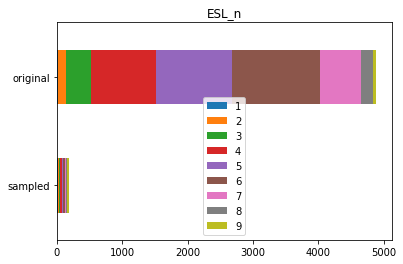

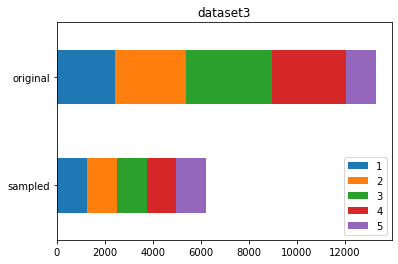

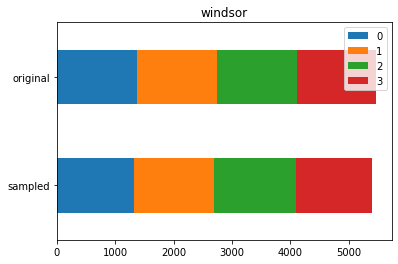

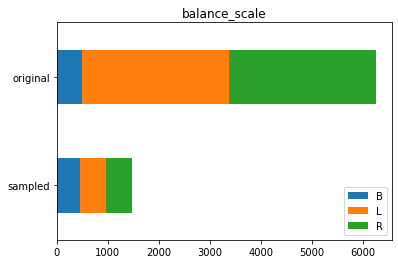

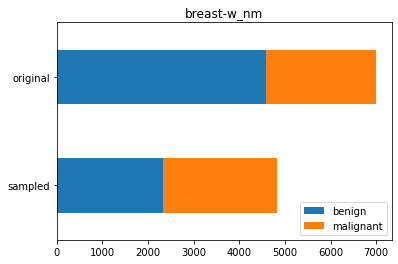

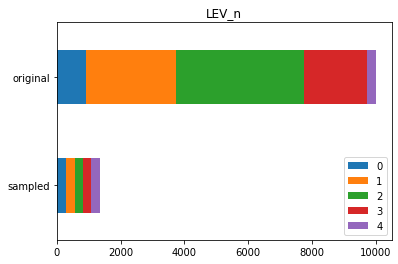

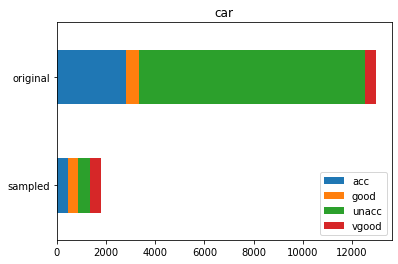

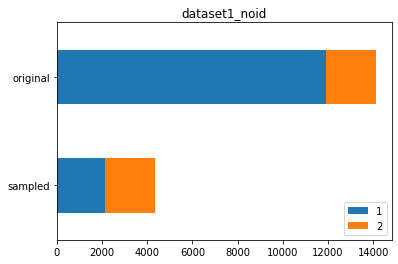

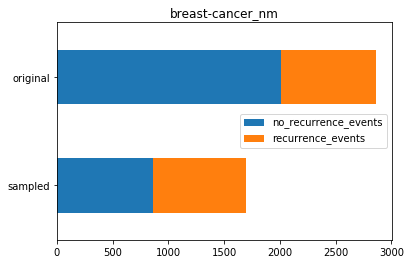

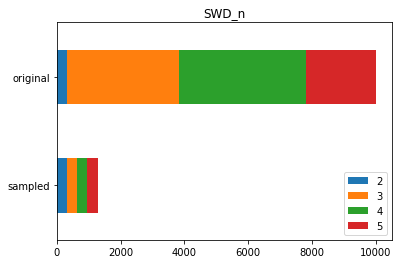

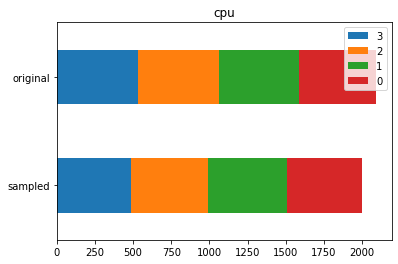

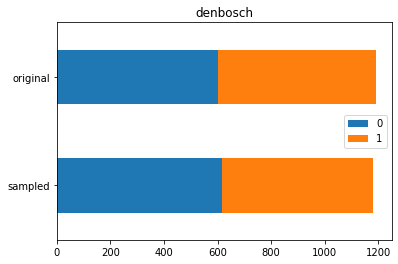

In [36]:
%matplotlib inline
for name, df in balanced_under_samples_by_dataset.items():
    print_distribution(name, df)

# Bootstrap check
Unique examples should constitute for around ```63%```.

### Test setup
Sample data below contains 10 examples from ```0``` class and 10 examples from ```1``` class (column ```2```). Index is preset to include duplicate values. In class ```0```, 2 indices are duplicated, in class ```1``` -- 3. The ratio of unique examples to sample size should therefore be equal to ```8/20 = 0.4```. Per-class score is an average of scores for each class, in this case: ```(8/10 + 7/10) / 2 = 0.75```.

In [11]:
def check(sample):
    return len(sample.index.unique()) / len(sample)


def check_per_class(sample):
    grouped = sample.groupby(sample.columns[-1], as_index=False)
    ratios = []
    for index, group in grouped:
        ratios.append(len(group.index.unique()) / len(group))
    return sum(ratios) / len(ratios)

data = pd.DataFrame({
    0: [1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1],
    1: [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2],
    2: [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
}, index=[1,2,3,4,5,6,7,8,1,2,1,2,3,4,5,6,7,1,2,3])

print(check(data))
print(check_per_class(data))

0.4
0.75


In [22]:
def run_check_for_dataset(name, samples):
    dataset = pd.read_csv(os.path.join(data_dir, '{}.csv'.format(name)), header=None)
    ratios = []
    for index, row in samples.iterrows():
        indices = row.values.tolist()
        sample = dataset.iloc[indices]
        ratios.append(check(sample))
    avg_ratio = sum(ratios) / len(ratios)
    return ratios, avg_ratio, dataset.shape[0]

In [23]:
def run_check_for_per_class(name, samples):
    dataset = pd.read_csv(os.path.join(data_dir, '{}.csv'.format(name)), header=None)
    ratios = []
    for index, row in samples.iterrows():
        indices = row.values.tolist()
        sample = dataset.iloc[indices]
        ratios.append(check_per_class(sample))
    avg_ratio = sum(ratios) / len(ratios)
    return ratios, avg_ratio

### Check baseline first: samples the size of dataset, all weights set to 1.0

In [30]:
from IPython.display import display

for name, data in samples_by_dataset.items():
    ratios, avg, size = run_check_for_dataset(name, data)
    per_class_ratios, per_class_avg = run_check_for_per_class(name, data)
    df = pd.DataFrame({'global ratios': ratios, 'per-class ratios': per_class_ratios})
    df['diff'] = df.apply(lambda x: abs(x['global ratios'] - x['per-class ratios']), axis=1)
    print('{}, size: {}, avg: {}, per-class avg: {}'.format(name, size, avg, per_class_avg))
    display(df)

housing, size: 506, avg: 0.6298418972332016, per-class avg: 0.6309623839367425


,global ratios,per-class ratios,diff
0,0.640316,0.641902,0.001586
1,0.618577,0.619467,0.000890
2,0.626482,0.626998,0.000516
3,0.630435,0.630469,0.000034
4,0.628458,0.628633,0.000175
5,0.642292,0.644685,0.002392
6,0.624506,0.625326,0.000820
7,0.620553,0.621846,0.001293
8,0.634387,0.635203,0.000815
9,0.632411,0.635095,0.002684


ERA_n, size: 1000, avg: 0.6285000000000001, per-class avg: 0.6324321073197046


,global ratios,per-class ratios,diff
0,0.614,0.611375,0.002625
1,0.636,0.649507,0.013507
2,0.623,0.610491,0.012509
3,0.635,0.642644,0.007644
4,0.614,0.623671,0.009671
5,0.629,0.636340,0.007340
6,0.642,0.638332,0.003668
7,0.626,0.640372,0.014372
8,0.645,0.651151,0.006151
9,0.621,0.620440,0.000560


breast-w, size: 699, avg: 0.632618025751073, per-class avg: 0.633268043872955


,global ratios,per-class ratios,diff
0,0.635193,0.631051,0.004143
1,0.642346,0.646046,0.003700
2,0.632332,0.634878,0.002546
3,0.616595,0.617765,0.001170
4,0.630901,0.643227,0.012326
5,0.640916,0.642049,0.001133
6,0.632332,0.635910,0.003578
7,0.643777,0.641929,0.001848
8,0.625179,0.622468,0.002711
9,0.626609,0.617359,0.009251


ESL_n, size: 488, avg: 0.6346311475409837, per-class avg: 0.678381328621866


,global ratios,per-class ratios,diff
0,0.616803,0.626998,0.010195
1,0.629098,0.633133,0.004035
2,0.645492,0.733697,0.088205
3,0.633197,0.727416,0.094220
4,0.661885,0.702906,0.041020
5,0.649590,0.748309,0.098719
6,0.643443,0.590294,0.053149
7,0.602459,0.659625,0.057166
8,0.627049,0.689876,0.062827
9,0.637295,0.671559,0.034264


dataset3, size: 1328, avg: 0.6297439759036145, per-class avg: 0.6312866013254117


,global ratios,per-class ratios,diff
0,0.620482,0.621249,0.000767
1,0.639307,0.640469,0.001162
2,0.625000,0.628726,0.003726
3,0.631777,0.630098,0.001679
4,0.636295,0.638941,0.002646
5,0.634789,0.638821,0.004031
6,0.625000,0.624069,0.000931
7,0.634789,0.636308,0.001519
8,0.621235,0.626215,0.004981
9,0.628765,0.627970,0.000795


windsor, size: 546, avg: 0.6393772893772892, per-class avg: 0.640946022759524


,global ratios,per-class ratios,diff
0,0.652015,0.652447,0.000433
1,0.630037,0.630068,0.000032
2,0.659341,0.659424,0.000083
3,0.635531,0.636643,0.001112
4,0.639194,0.642936,0.003742
5,0.639194,0.639889,0.000694
6,0.650183,0.655208,0.005025
7,0.635531,0.638576,0.003045
8,0.639194,0.639640,0.000446
9,0.613553,0.614629,0.001076


balance_scale, size: 625, avg: 0.62928, per-class avg: 0.6354184164763794


,global ratios,per-class ratios,diff
0,0.6192,0.636416,0.017216
1,0.6400,0.633586,0.006414
2,0.6304,0.651207,0.020807
3,0.6080,0.624751,0.016751
4,0.6352,0.639715,0.004515
5,0.6256,0.631401,0.005801
6,0.6384,0.640701,0.002301
7,0.6176,0.616756,0.000844
8,0.6368,0.636400,0.000400
9,0.6416,0.643251,0.001651


breast-w_nm, size: 699, avg: 0.6263233190271817, per-class avg: 0.6261627991056706


,global ratios,per-class ratios,diff
0,0.645207,0.651664,0.006456
1,0.632332,0.629205,0.003127
2,0.618026,0.619432,0.001407
3,0.636624,0.634008,0.002616
4,0.639485,0.643303,0.003818
5,0.608011,0.612426,0.004415
6,0.623748,0.623611,0.000137
7,0.609442,0.604022,0.005420
8,0.625179,0.617826,0.007353
9,0.625179,0.626130,0.000951


LEV_n, size: 1000, avg: 0.6434, per-class avg: 0.6411108539208208


,global ratios,per-class ratios,diff
0,0.640,0.639099,0.000901
1,0.643,0.676901,0.033901
2,0.658,0.635570,0.022430
3,0.649,0.656051,0.007051
4,0.643,0.622820,0.020180
5,0.638,0.638380,0.000380
6,0.625,0.623661,0.001339
7,0.629,0.630657,0.001657
8,0.656,0.648933,0.007067
9,0.653,0.639036,0.013964


car, size: 1296, avg: 0.6303240740740742, per-class avg: 0.6258239757528308


,global ratios,per-class ratios,diff
0,0.621142,0.615516,0.005626
1,0.649691,0.654132,0.004441
2,0.617284,0.595193,0.022091
3,0.639660,0.669848,0.030188
4,0.645062,0.637456,0.007606
5,0.618056,0.636589,0.018533
6,0.621142,0.616749,0.004393
7,0.630401,0.601282,0.029120
8,0.631173,0.600042,0.031131
9,0.629630,0.631432,0.001803


dataset1_noid, size: 1411, avg: 0.6359319631467044, per-class avg: 0.6332086855430582


,global ratios,per-class ratios,diff
0,0.623671,0.640721,0.017049
1,0.644224,0.640048,0.004176
2,0.626506,0.623483,0.003023
3,0.647059,0.653799,0.006741
4,0.626506,0.617568,0.008938
5,0.637137,0.627032,0.010105
6,0.622962,0.623559,0.000596
7,0.647059,0.635114,0.011945
8,0.634302,0.616651,0.017650
9,0.649894,0.654112,0.004219


breast-cancer_nm, size: 286, avg: 0.6262237762237761, per-class avg: 0.6226223754320783


,global ratios,per-class ratios,diff
0,0.594406,0.595333,0.000927
1,0.632867,0.618056,0.014812
2,0.660839,0.661419,0.000579
3,0.632867,0.624909,0.007958
4,0.625874,0.627357,0.001483
5,0.625874,0.640781,0.014907
6,0.597902,0.577880,0.020022
7,0.650350,0.640649,0.009701
8,0.601399,0.603387,0.001988
9,0.639860,0.636453,0.003407


SWD_n, size: 1000, avg: 0.6319, per-class avg: 0.633453993407342


,global ratios,per-class ratios,diff
0,0.627,0.620544,0.006456
1,0.635,0.628360,0.006640
2,0.626,0.631375,0.005375
3,0.642,0.647961,0.005961
4,0.628,0.639764,0.011764
5,0.630,0.634628,0.004628
6,0.646,0.661236,0.015236
7,0.628,0.629402,0.001402
8,0.641,0.634087,0.006913
9,0.616,0.607183,0.008817


cpu, size: 209, avg: 0.639712918660287, per-class avg: 0.6431617853152212


,global ratios,per-class ratios,diff
0,0.650718,0.651022,0.000304
1,0.612440,0.618084,0.005644
2,0.655502,0.658331,0.002828
3,0.626794,0.633050,0.006256
4,0.631579,0.634062,0.002483
5,0.688995,0.690684,0.001689
6,0.650718,0.651666,0.000948
7,0.622010,0.623914,0.001904
8,0.645933,0.660358,0.014425
9,0.612440,0.610446,0.001994


denbosch, size: 119, avg: 0.6327731092436977, per-class avg: 0.6348628807530782


,global ratios,per-class ratios,diff
0,0.638655,0.650000,0.011345
1,0.630252,0.632776,0.002524
2,0.630252,0.630952,0.000700
3,0.613445,0.613200,0.000246
4,0.630252,0.629960,0.000292
5,0.605042,0.609801,0.004759
6,0.638655,0.642593,0.003937
7,0.655462,0.656621,0.001159
8,0.630252,0.626847,0.003406
9,0.655462,0.655879,0.000417


### Check weighted sampling (sample size equal to dataset size)

In [40]:
for name, data in balanced_samples_by_dataset.items():
    ratios, avg, size = run_check_for_dataset(name, data)
    per_class_ratios, per_class_avg = run_check_for_per_class(name, data)
    df = pd.DataFrame({'global ratios': ratios, 'per-class ratios': per_class_ratios})
    df['diff'] = df.apply(lambda x: abs(x['global ratios'] - x['per-class ratios']), axis=1)
    print('{}, size: {}, avg: {}, per-class avg: {}'.format(name, size, avg, per_class_avg))
    display(df)

housing, size: 506, avg: 0.6337944664031621, per-class avg: 0.6352312429547673


,global ratios,per-class ratios,diff
0,0.626482,0.626627,0.000145
1,0.640316,0.642003,0.001687
2,0.624506,0.626222,0.001716
3,0.642292,0.645701,0.003408
4,0.650198,0.652214,0.002017
5,0.634387,0.634445,0.000057
6,0.640316,0.641850,0.001534
7,0.642292,0.643553,0.001261
8,0.632411,0.634600,0.002189
9,0.604743,0.605097,0.000353


ERA_n, size: 1000, avg: 0.5660000000000001, per-class avg: 0.5669932841000092


,global ratios,per-class ratios,diff
0,0.548,0.553729,0.005729
1,0.552,0.554659,0.002659
2,0.575,0.567694,0.007306
3,0.560,0.561603,0.001603
4,0.571,0.569528,0.001472
5,0.561,0.557020,0.003980
6,0.573,0.582890,0.009890
7,0.572,0.561947,0.010053
8,0.575,0.586494,0.011494
9,0.573,0.574369,0.001369


breast-w, size: 699, avg: 0.6127324749642346, per-class avg: 0.6124630781042241


,global ratios,per-class ratios,diff
0,0.630901,0.631287,0.000386
1,0.629471,0.630479,0.001009
2,0.625179,0.622775,0.002404
3,0.582260,0.588573,0.006313
4,0.626609,0.626734,0.000124
5,0.615165,0.612763,0.002401
6,0.619456,0.618398,0.001058
7,0.593705,0.594891,0.001185
8,0.600858,0.597054,0.003804
9,0.603720,0.601675,0.002044


ESL_n, size: 488, avg: 0.4721311475409836, per-class avg: 0.471352918965742


,global ratios,per-class ratios,diff
0,0.456967,0.460121,0.003154
1,0.500000,0.481499,0.018501
2,0.481557,0.496352,0.014795
3,0.438525,0.459362,0.020837
4,0.485656,0.474679,0.010976
5,0.463115,0.464447,0.001333
6,0.479508,0.473885,0.005623
7,0.463115,0.462189,0.000925
8,0.500000,0.483097,0.016903
9,0.452869,0.457897,0.005029


dataset3, size: 1328, avg: 0.6104668674698794, per-class avg: 0.611358453862454


,global ratios,per-class ratios,diff
0,0.616717,0.618933,0.002216
1,0.615211,0.613479,0.001731
2,0.616717,0.613414,0.003303
3,0.614458,0.610200,0.004258
4,0.611446,0.612157,0.000711
5,0.618976,0.618557,0.000419
6,0.595633,0.600425,0.004792
7,0.604669,0.606700,0.002031
8,0.597892,0.603694,0.005802
9,0.612952,0.616026,0.003074


windsor, size: 546, avg: 0.6305860805860805, per-class avg: 0.6323845102021398


,global ratios,per-class ratios,diff
0,0.637363,0.639617,0.002255
1,0.624542,0.628423,0.003881
2,0.641026,0.641915,0.000890
3,0.626374,0.627275,0.000901
4,0.620879,0.621567,0.000688
5,0.642857,0.645482,0.002625
6,0.641026,0.642103,0.001077
7,0.615385,0.619902,0.004517
8,0.637363,0.637683,0.000320
9,0.619048,0.619878,0.000830


balance_scale, size: 625, avg: 0.5534399999999999, per-class avg: 0.5574688440124567


,global ratios,per-class ratios,diff
0,0.5456,0.555181,0.009581
1,0.5680,0.561691,0.006309
2,0.5424,0.555064,0.012664
3,0.5552,0.563382,0.008182
4,0.5536,0.564035,0.010435
5,0.5664,0.553114,0.013286
6,0.5488,0.554979,0.006179
7,0.5632,0.566168,0.002968
8,0.5488,0.544224,0.004576
9,0.5424,0.556851,0.014451


breast-w_nm, size: 699, avg: 0.6123032904148784, per-class avg: 0.6133787852414213


,global ratios,per-class ratios,diff
0,0.586552,0.587094,0.000542
1,0.612303,0.612805,0.000502
2,0.636624,0.636467,0.000156
3,0.587983,0.598279,0.010296
4,0.619456,0.617807,0.001650
5,0.605150,0.607005,0.001855
6,0.628040,0.622715,0.005325
7,0.596567,0.604048,0.007481
8,0.632332,0.631392,0.000940
9,0.618026,0.616175,0.001851


LEV_n, size: 1000, avg: 0.5488000000000001, per-class avg: 0.5459488403441216


,global ratios,per-class ratios,diff
0,0.541,0.548653,0.007653
1,0.556,0.549218,0.006782
2,0.557,0.552985,0.004015
3,0.544,0.543739,0.000261
4,0.558,0.545737,0.012263
5,0.544,0.541745,0.002255
6,0.543,0.552258,0.009258
7,0.542,0.534053,0.007947
8,0.555,0.545524,0.009476
9,0.548,0.545577,0.002423


car, size: 1296, avg: 0.430787037037037, per-class avg: 0.43208617820384176


,global ratios,per-class ratios,diff
0,0.435185,0.432217,0.002968
1,0.422840,0.421220,0.001620
2,0.432099,0.426424,0.005674
3,0.432099,0.438193,0.006094
4,0.433642,0.430493,0.003149
5,0.434414,0.427702,0.006711
6,0.422068,0.426856,0.004788
7,0.432870,0.439341,0.006471
8,0.425154,0.441707,0.016553
9,0.437500,0.436708,0.000792


dataset1_noid, size: 1411, avg: 0.5275690999291284, per-class avg: 0.5263975934234957


,global ratios,per-class ratios,diff
0,0.513820,0.519361,0.005541
1,0.525159,0.533950,0.008790
2,0.546421,0.535745,0.010676
3,0.526577,0.524824,0.001753
4,0.536499,0.533437,0.003062
5,0.531538,0.532725,0.001187
6,0.526577,0.527400,0.000823
7,0.519490,0.514865,0.004625
8,0.525159,0.513811,0.011349
9,0.524451,0.527859,0.003408


breast-cancer_nm, size: 286, avg: 0.6006993006993007, per-class avg: 0.6036524288996854


,global ratios,per-class ratios,diff
0,0.604895,0.609430,0.004535
1,0.590909,0.591794,0.000885
2,0.569930,0.583098,0.013168
3,0.615385,0.611976,0.003409
4,0.562937,0.572544,0.009607
5,0.601399,0.598737,0.002661
6,0.604895,0.614150,0.009255
7,0.636364,0.634149,0.002215
8,0.608392,0.602536,0.005856
9,0.611888,0.618111,0.006223


SWD_n, size: 1000, avg: 0.5451, per-class avg: 0.5466217114974588


,global ratios,per-class ratios,diff
0,0.551,0.565237,0.014237
1,0.535,0.541621,0.006621
2,0.516,0.531934,0.015934
3,0.556,0.553040,0.002960
4,0.554,0.549266,0.004734
5,0.540,0.545151,0.005151
6,0.560,0.554541,0.005459
7,0.543,0.545608,0.002608
8,0.547,0.535843,0.011157
9,0.549,0.543977,0.005023


cpu, size: 209, avg: 0.631578947368421, per-class avg: 0.6373796243005195


,global ratios,per-class ratios,diff
0,0.631579,0.632392,0.000813
1,0.631579,0.635700,0.004121
2,0.602871,0.618658,0.015788
3,0.598086,0.600090,0.002004
4,0.650718,0.656648,0.005930
5,0.660287,0.662264,0.001976
6,0.650718,0.656047,0.005329
7,0.598086,0.600322,0.002236
8,0.645933,0.651245,0.005312
9,0.645933,0.660430,0.014497


denbosch, size: 119, avg: 0.6361344537815125, per-class avg: 0.638132557595961


,global ratios,per-class ratios,diff
0,0.680672,0.684188,0.003516
1,0.605042,0.608352,0.003310
2,0.647059,0.647819,0.000760
3,0.663866,0.663842,0.000024
4,0.630252,0.632937,0.002684
5,0.605042,0.606819,0.001777
6,0.697479,0.699573,0.002094
7,0.621849,0.629592,0.007743
8,0.621849,0.620069,0.001780
9,0.588235,0.588136,0.000100


### Check weighted undersampling (reduced sample size)

In [37]:
for name, data in balanced_under_samples_by_dataset.items():
    ratios, avg, size = run_check_for_dataset(name, data)
    per_class_ratios, per_class_avg = run_check_for_per_class(name, data)
    df = pd.DataFrame({'global ratios': ratios, 'per-class ratios': per_class_ratios})
    df['diff'] = df.apply(lambda x: abs(x['global ratios'] - x['per-class ratios']), axis=1)
    print('{}, size: {}, avg: {}, per-class avg: {}'.format(name, size, avg, per_class_avg))
    display(df)

housing, size: 506, avg: 0.6391129032258065, per-class avg: 0.6404492076955856


,global ratios,per-class ratios,diff
0,0.633065,0.634367,0.001303
1,0.629032,0.628592,0.000440
2,0.653226,0.654480,0.001254
3,0.620968,0.622478,0.001510
4,0.661290,0.663332,0.002042
5,0.629032,0.629616,0.000584
6,0.647177,0.651280,0.004103
7,0.645161,0.645331,0.000170
8,0.647177,0.647917,0.000740
9,0.625000,0.627098,0.002098


ERA_n, size: 1000, avg: 0.882716049382716, per-class avg: 0.8881414262163281


,global ratios,per-class ratios,diff
0,0.851852,0.855967,0.004116
1,0.882716,0.899274,0.016558
2,0.913580,0.904802,0.008778
3,0.907407,0.902837,0.004570
4,0.895062,0.909925,0.014863
5,0.870370,0.881126,0.010755
6,0.876543,0.883935,0.007392
7,0.882716,0.881255,0.001461
8,0.845679,0.865603,0.019924
9,0.901235,0.896689,0.004545


breast-w, size: 699, avg: 0.7029045643153528, per-class avg: 0.7032353879373958


,global ratios,per-class ratios,diff
0,0.695021,0.691632,0.003389
1,0.715768,0.713679,0.002089
2,0.699170,0.703834,0.004664
3,0.724066,0.726058,0.001991
4,0.717842,0.715431,0.002411
5,0.676349,0.681758,0.005409
6,0.703320,0.700997,0.002323
7,0.726141,0.721885,0.004256
8,0.688797,0.693052,0.004255
9,0.682573,0.684029,0.001457


ESL_n, size: 488, avg: 0.9166666666666667, per-class avg: 0.9428075396825397


,global ratios,per-class ratios,diff
0,0.888889,0.916667,0.027778
1,0.888889,0.944444,0.055556
2,0.944444,0.952381,0.007937
3,0.833333,0.879630,0.046296
4,0.944444,0.944444,0.000000
5,1.000000,1.000000,0.000000
6,1.000000,1.000000,0.000000
7,0.888889,0.925926,0.037037
8,0.833333,0.895833,0.062500
9,0.944444,0.968750,0.024306


dataset3, size: 1328, avg: 0.776451612903226, per-class avg: 0.7772037178837677


,global ratios,per-class ratios,diff
0,0.774194,0.775616,0.001422
1,0.758065,0.756052,0.002013
2,0.780645,0.778429,0.002216
3,0.764516,0.765504,0.000988
4,0.798387,0.795272,0.003115
5,0.779032,0.777758,0.001274
6,0.774194,0.785229,0.011036
7,0.779032,0.782159,0.003127
8,0.782258,0.781156,0.001102
9,0.774194,0.774862,0.000668


windsor, size: 546, avg: 0.6266666666666667, per-class avg: 0.627689977730705


,global ratios,per-class ratios,diff
0,0.627778,0.629330,0.001553
1,0.616667,0.617974,0.001307
2,0.638889,0.638898,0.000009
3,0.633333,0.636027,0.002693
4,0.637037,0.637340,0.000302
5,0.616667,0.616888,0.000222
6,0.614815,0.615618,0.000803
7,0.620370,0.619956,0.000414
8,0.616667,0.620458,0.003791
9,0.644444,0.644411,0.000033


balance_scale, size: 625, avg: 0.8333333333333334, per-class avg: 0.8308723814705046


,global ratios,per-class ratios,diff
0,0.857143,0.851566,0.005577
1,0.823129,0.825567,0.002438
2,0.857143,0.846807,0.010336
3,0.816327,0.819801,0.003474
4,0.829932,0.827749,0.002183
5,0.877551,0.860640,0.016911
6,0.836735,0.825859,0.010876
7,0.836735,0.831890,0.004845
8,0.795918,0.800654,0.004735
9,0.802721,0.818192,0.015471


breast-w_nm, size: 699, avg: 0.695643153526971, per-class avg: 0.6984679076005436


,global ratios,per-class ratios,diff
0,0.678423,0.679536,0.001113
1,0.717842,0.720978,0.003135
2,0.676349,0.684324,0.007975
3,0.701245,0.708283,0.007039
4,0.684647,0.689062,0.004415
5,0.674274,0.678332,0.004058
6,0.717842,0.715741,0.002101
7,0.709544,0.706655,0.002888
8,0.680498,0.686001,0.005503
9,0.715768,0.715768,0.000000


LEV_n, size: 1000, avg: 0.8755555555555554, per-class avg: 0.8808138169838463


,global ratios,per-class ratios,diff
0,0.888889,0.891634,0.002745
1,0.837037,0.854398,0.017361
2,0.851852,0.867891,0.016039
3,0.911111,0.909090,0.002021
4,0.888889,0.884284,0.004605
5,0.851852,0.848733,0.003119
6,0.896296,0.898926,0.002630
7,0.866667,0.882266,0.015599
8,0.866667,0.867781,0.001114
9,0.896296,0.903136,0.006840


car, size: 1296, avg: 0.7972222222222222, per-class avg: 0.7964884939157635


,global ratios,per-class ratios,diff
0,0.844444,0.823668,0.020776
1,0.811111,0.809563,0.001549
2,0.788889,0.803471,0.014582
3,0.822222,0.812033,0.010189
4,0.822222,0.823167,0.000945
5,0.777778,0.790624,0.012846
6,0.777778,0.778398,0.000620
7,0.794444,0.794192,0.000253
8,0.733333,0.731750,0.001583
9,0.800000,0.798020,0.001980


dataset1_noid, size: 1411, avg: 0.7681192660550459, per-class avg: 0.7725929667082178


,global ratios,per-class ratios,diff
0,0.754587,0.752615,0.001972
1,0.766055,0.770037,0.003982
2,0.791284,0.794385,0.003101
3,0.766055,0.767968,0.001913
4,0.756881,0.756881,0.000000
5,0.800459,0.801054,0.000596
6,0.768349,0.771437,0.003089
7,0.777523,0.782929,0.005406
8,0.738532,0.751167,0.012635
9,0.761468,0.777456,0.015988


breast-cancer_nm, size: 286, avg: 0.72, per-class avg: 0.7198633021805443


,global ratios,per-class ratios,diff
0,0.694118,0.690664,0.003453
1,0.705882,0.717193,0.011311
2,0.694118,0.698309,0.004192
3,0.758824,0.754682,0.004142
4,0.729412,0.727564,0.001848
5,0.717647,0.712581,0.005066
6,0.682353,0.678472,0.003881
7,0.717647,0.716463,0.001184
8,0.735294,0.734081,0.001213
9,0.764706,0.768623,0.003917


SWD_n, size: 1000, avg: 0.878125, per-class avg: 0.879321397511563


,global ratios,per-class ratios,diff
0,0.867188,0.872496,0.005308
1,0.828125,0.831689,0.003564
2,0.843750,0.855815,0.012065
3,0.851562,0.869462,0.017899
4,0.921875,0.919440,0.002435
5,0.898438,0.895455,0.002982
6,0.859375,0.853702,0.005673
7,0.906250,0.894015,0.012235
8,0.898438,0.899384,0.000947
9,0.906250,0.901757,0.004493


cpu, size: 209, avg: 0.649, per-class avg: 0.6518101244316995


,global ratios,per-class ratios,diff
0,0.685,0.685006,0.000006
1,0.615,0.619104,0.004104
2,0.655,0.661910,0.006910
3,0.635,0.636683,0.001683
4,0.635,0.638607,0.003607
5,0.625,0.625785,0.000785
6,0.650,0.650465,0.000465
7,0.670,0.675228,0.005228
8,0.665,0.669693,0.004693
9,0.655,0.655620,0.000620


denbosch, size: 119, avg: 0.6355932203389831, per-class avg: 0.6392487774866414


,global ratios,per-class ratios,diff
0,0.686441,0.687931,0.001490
1,0.627119,0.625874,0.001245
2,0.652542,0.654666,0.002124
3,0.635593,0.636797,0.001203
4,0.627119,0.627016,0.000103
5,0.694915,0.708824,0.013908
6,0.652542,0.658533,0.005991
7,0.576271,0.583929,0.007657
8,0.610169,0.607431,0.002739
9,0.593220,0.601488,0.008268
